# Initializatoin

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/Colab\ Notebooks/Deep\ Learning\ Course/HW03

/content/drive/.shortcut-targets-by-id/1uDq0M9_Wiov9oQCfOUMaHhMYYxVvHdyH/Deep Learning Course/HW03


## Imports

In [12]:
import math
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import torch.optim as optim

from torch.autograd import Variable
from torch.nn import Parameter

# RNN

## Traditional RNN

In the introductory section, we delve into the architecture of Recurrent Neural Networks (RNNs) and elucidate their training methodologies. To gain a deeper understanding of RNNs, you're encouraged to explore further [HERE](https://stanford.edu/~shervine/teaching/cs-230/cheatsheet-recurrent-neural-network)

For the task at hand, you've been furnished with the Names dataset, a compilation comprising thousands of surnames from 18 distinct languages of origin. Your objective is to prognosticate the language of origin for a given name, relying solely on its orthography. Your task primarily involves implementing the section demarcated by `#your_code`.

In [ ]:
dataset = Dataset()
for i in range(10):
    category, line, _, _ = dataset.randomTrainingExample()
    print('category =', category, '- random name =', line)

Error occurred while downloading data.zip: --2024-03-22 13:13:29--  https://download.pytorch.org/tutorial/data.zip

Resolving download.pytorch.org (download.pytorch.org)... 52.84.229.13, 52.84.229.68, 52.84.229.87, ...

Connecting to download.pytorch.org (download.pytorch.org)|52.84.229.13|:443... connected.

HTTP request sent, awaiting response... 200 OK

Length: 2882130 (2.7M) [application/zip]

Saving to: ‘data.zip’



     0K .......... .......... .......... .......... ..........  1% 12.0M 0s

    50K .......... .......... .......... .......... ..........  3% 52.0M 0s

   100K .......... .......... .......... .......... ..........  5% 23.2M 0s

   150K .......... .......... .......... .......... ..........  7% 38.2M 0s

   200K .......... .......... .......... .......... ..........  8% 57.1M 0s

   250K .......... .......... .......... .......... .......... 10% 45.0M 0s

   300K .......... .......... .......... .......... .......... 12% 55.3M 0s

   350K .......... .......... .....

In [ ]:
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()

        #your_code
        self.hidden_size = hidden_size
        self.i2h =
        self.h2o =
        self.softmax =

    def forward(self, input, hidden):

        #your_code
        combined =
        hidden =
        output =
        output =
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, self.hidden_size)

n_hidden = 128
n_letters = dataset.n_letters
n_categories = dataset.n_categories
rnn = RNN(n_letters, n_hidden, n_categories)

In [ ]:
#your_code
criterion =
learning_rate =

def train(category_tensor, name_tensor):
    hidden = rnn.initHidden()
    rnn.zero_grad()

    #your_code

    loss = criterion(output, category_tensor)
    loss.backward()

    # Add parameters' gradients to their values, multiplied by learning rate
    for p in rnn.parameters():
        p.data.add_(p.grad.data, alpha=-learning_rate)

    return output, loss.item()

And here you can train your model and see it's performance after each 5000 iterations

In [ ]:
n_iters = 100000
print_every = 5000

current_loss = 0
all_losses = []

for iter in range(1, n_iters + 1):
    category, line, category_tensor, line_tensor = dataset.randomTrainingExample()
    output, loss = train(category_tensor, line_tensor)
    current_loss += loss

    if iter % print_every == 0:
        guess, _ = dataset.categoryFromOutput(output)
        correct = '✓' if guess == category else '✗ (%s)' % category
        print('%d %d%% %.4f %s is predicted as a "%s" name, status = %s' % (iter, iter / n_iters * 100, loss, line, guess, correct))

    if iter % 1000 == 0:
        all_losses.append(current_loss / 1000)
        current_loss = 0

plt.figure()
plt.plot(all_losses)

## Traditional RNN Disadvantages

In this part, we aim to delve into the limitations of traditional RNNs:
1.   Recurrent computation is slow
2.   They have difficulty accessing information from many steps back.

You are provided with a simple code that helps you to give the idea better. By modifying this code, you are able to demonstrate the mentioned disadvantages, but you are also free to change the code if needed or use any dataset you want.

**Question:** Do you think using GPU instead of CPU completely solves the first problem?

Note: The main goal of this part is to help you understand these problems better. Don't be too hard to implement and delivery.

Epoch [10/100], Loss: 1.2545

Epoch [20/100], Loss: 1.1593

Epoch [30/100], Loss: 1.0775

Epoch [40/100], Loss: 1.0050

Epoch [50/100], Loss: 0.9362

Epoch [60/100], Loss: 0.8665

Epoch [70/100], Loss: 0.7919

Epoch [80/100], Loss: 0.7085

Epoch [90/100], Loss: 0.6107

Epoch [100/100], Loss: 0.4938


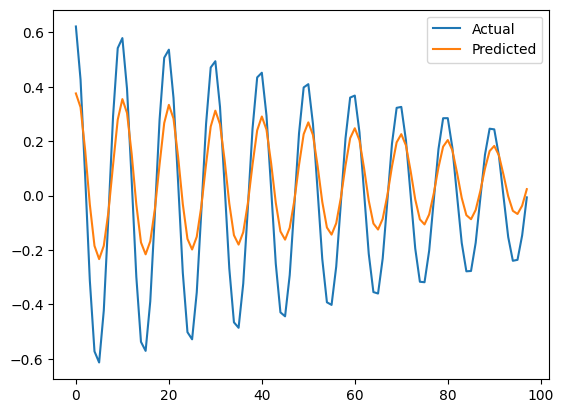

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# Generate sinusoidal temperature data with decreasing range over time
np.random.seed(0)
num_periods = 50
timesteps_per_period = 10
total_timesteps = num_periods * timesteps_per_period

# Generate decreasing factor
decreasing_factor = np.linspace(1, 0.1, total_timesteps)

# Generate temperature data with decreasing sinusoidal range
temperature_data = np.sin(np.linspace(0, 2*np.pi*num_periods, total_timesteps)) * decreasing_factor

# Normalize the data
temperature_data = (temperature_data - np.mean(temperature_data)) / np.std(temperature_data)

# Convert numpy array to PyTorch tensor
temperature_data = torch.tensor(temperature_data, dtype=torch.float32).view(-1, 1)

# Define function to create dataset with sinusoidal pattern
def create_dataset(data, seq_length):
    X, Y = [], []
    for i in range(len(data) - seq_length):
        seq_in = data[i:i+seq_length]
        seq_out = data[i+seq_length]
        X.append(seq_in)
        Y.append(seq_out)
    return torch.stack(X), torch.stack(Y)

# Define sequence length and create dataset
sequence_length = 10  # Number of previous days to look at for prediction
X, Y = create_dataset(temperature_data, sequence_length)

# Split the dataset into train and test sets
train_size = int(0.8 * len(X))
test_size = len(X) - train_size
X_train, X_test = X[:train_size], X[train_size:]
Y_train, Y_test = Y[:train_size], Y[train_size:]

# Define RNN model
class SimpleRNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleRNN, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.rnn(x)
        out = self.fc(out[:, -1, :])
        return out

# Define model parameters
input_size = 1
hidden_size = 10
output_size = 1

# Instantiate the model
model = SimpleRNN(input_size, hidden_size, output_size)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    outputs = model(X_train)
    loss = criterion(outputs, Y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model
model.eval()
with torch.no_grad():
    test_predictions = model(X_test)

# Plot actual vs predicted
plt.plot(Y_test.numpy(), label='Actual')
plt.plot(test_predictions.numpy(), label='Predicted')
plt.legend()
plt.show()

# LSTM Preparation

Now that you have experience with traditional RNNs, it's time to implement the LSTM model. Your goal is to implement the cell and model for LSTM architecture. The proposed dataset for this section is MNIST, allowing you to focus solely on model implementation.

In [3]:
train_dataset = datasets.MNIST(root='./data',
                               train=True,
                               transform=transforms.ToTensor(),
                               download=True)

test_dataset = datasets.MNIST(root='./data',
                              train=False,
                              transform=transforms.ToTensor())

batch_size = 128
n_iters = 6000
num_epochs = int(n_iters / (len(train_dataset) / batch_size))

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:04<00:00, 2081535.37it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 151789.98it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:01<00:00, 1444400.95it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 2180193.27it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [4]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

## LSTM Cells

In [5]:
class LSTMCell(nn.Module):
    def __init__(self, input_size, hidden_size, bias=True):
        super(LSTMCell, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.bias = bias

        # Linear layers for input and hidden states
        self.xh = nn.Linear(input_size, hidden_size * 4, bias=bias)
        self.hh = nn.Linear(hidden_size, hidden_size * 4, bias=bias)
        self.reset_parameters()

    def reset_parameters(self):
        std = 1.0 / np.sqrt(self.hidden_size)
        for w in self.parameters():
            w.data.uniform_(-std, std)

    def forward(self, input, hx=None):
        if hx is None:
            hx = Variable(input.new_zeros(input.size(0), self.hidden_size))
            hx = (hx, hx)

        hx, cx = hx

        # Compute the gates
        gates = self.xh(input) + self.hh(hx)
        input_gate, forget_gate, cell_gate, output_gate = gates.chunk(4, 1)

        # Apply activation functions
        i_t = torch.sigmoid(input_gate)
        f_t = torch.sigmoid(forget_gate)
        g_t = torch.tanh(cell_gate)
        o_t = torch.sigmoid(output_gate)

        # Update cell state and hidden state
        cy = f_t * cx + i_t * g_t
        hy = o_t * torch.tanh(cy)

        return (hy, cy)


## LSTM Models

In [22]:
class LSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(LSTMModel, self).__init__()

        self.hidden_dim = hidden_dim

        # Define LSTM layer
        self.lstm = LSTMCell(input_dim, hidden_dim)

        # Fully connected layer for output
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):

        # Initialize hidden state and cell state with zeros
        h0 = Variable(torch.zeros(x.size(0), self.hidden_dim))
        c0 = Variable(torch.zeros(x.size(0), self.hidden_dim))

        hn = h0
        cn = c0

        for seq in range(x.size(1)):
            # Pass through LSTMCell for each timestep
            hn, cn = self.lstm(x[:, seq, :], (hn, cn))

        # Stack outputs for each timestep and pass through the fully connected layer
        out = self.fc(hn)

        return out

In [21]:
images.squeeze().shape

torch.Size([128, 28, 28])

In [26]:
input_dim = 28
hidden_dim = 128
output_dim = 10

model = LSTMModel(input_dim, hidden_dim, output_dim)

# Define training parameters
learning_rate = 0.001
criterion = nn.CrossEntropyLoss()  # Cross-entropy loss for classification
optimizer = optim.Adam(model.parameters(), lr=learning_rate)  # Adam optimizer

# Training loop
num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for i, (images, labels) in enumerate(train_loader):
        # Modify the images to fit the input dimensions of LSTM
        images = images.squeeze()
        # Clear the gradients
        optimizer.zero_grad()
    
        # Forward pass
        outputs = model(images)

        # Compute the loss
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        # Print loss statistics
        running_loss += loss.item()
        if i % 100 == 99:    # Print every 100 mini-batches
            print(f'Epoch [{epoch + 1}/{num_epochs}], Step [{i + 1}/{len(train_loader)}], Loss: {running_loss / 100:.4f}')
            running_loss = 0.0

Epoch [1/10], Step [100/469], Loss: 1.5423
Epoch [1/10], Step [200/469], Loss: 0.4952
Epoch [1/10], Step [300/469], Loss: 0.3529
Epoch [1/10], Step [400/469], Loss: 0.2752
Epoch [2/10], Step [100/469], Loss: 0.1983
Epoch [2/10], Step [200/469], Loss: 0.1895
Epoch [2/10], Step [300/469], Loss: 0.1740
Epoch [2/10], Step [400/469], Loss: 0.1512
Epoch [3/10], Step [100/469], Loss: 0.1367
Epoch [3/10], Step [200/469], Loss: 0.1237
Epoch [3/10], Step [300/469], Loss: 0.1184
Epoch [3/10], Step [400/469], Loss: 0.1164
Epoch [4/10], Step [100/469], Loss: 0.0988
Epoch [4/10], Step [200/469], Loss: 0.0867
Epoch [4/10], Step [300/469], Loss: 0.0983
Epoch [4/10], Step [400/469], Loss: 0.0894
Epoch [5/10], Step [100/469], Loss: 0.0713
Epoch [5/10], Step [200/469], Loss: 0.0721
Epoch [5/10], Step [300/469], Loss: 0.0812
Epoch [5/10], Step [400/469], Loss: 0.0770
Epoch [6/10], Step [100/469], Loss: 0.0582
Epoch [6/10], Step [200/469], Loss: 0.0682
Epoch [6/10], Step [300/469], Loss: 0.0631
Epoch [6/10

In [27]:
# Testing loop
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        images = images.squeeze()  # Squeeze the images
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the model on the test images: {100 * correct / total:.2f}%')

Accuracy of the model on the test images: 98.27%
